In [1]:

from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)



In [3]:
import diffprivlib.models as models

In [4]:
clf = models.GaussianNB()
clf.fit(X_train, y_train)

clf.predict(X_test)

from sklearn.metrics import accuracy_score

print("Test accuracy: %f" % accuracy_score(y_test, clf.predict(X_test)))


Test accuracy: 0.800000


C:\Users\aanw\OneDrive - Deakin University\Archives\Teaching\T2 2020\SIT719\p01\diffprivlib\models\naive_bayes.py:93: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  "privacy leakage, specify bounds for each dimension.", PrivacyLeakWarning)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 50)
bounds = [(4.3, 7.9), (2.0, 4.4), (1.1, 6.9), (0.1, 2.5)]
accuracy = list()

for epsilon in epsilons:
    clf = models.GaussianNB(bounds=bounds, epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append(accuracy_score(y_test, clf.predict(X_test)))


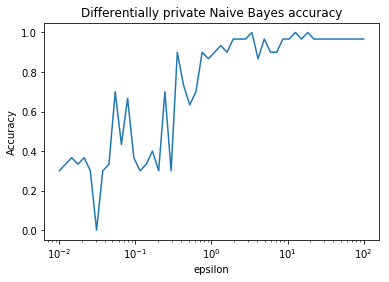

In [7]:
plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()